### Question 1

In [11]:
from DnaUtils import readFasta
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 999
import re
import numpy as np
ids,seqs = readFasta("Q1.fasta")

hydro = {x : int(y) for x,y in zip("DEHKRNPQSTACGMYFILVW","11111222224444455555")}
calc = lambda x : hydro[x]
binary = lambda x : int(hydro[x] > mean)

In [12]:
seqs[0] = "AISTATTATAIKSWVKTIARNLLNSALASDASEDASEARIKLNAILKILKIN"

In [15]:
temp = list(map(calc,seqs[0]))

In [25]:
sum([x for x in temp if x < 3])

41

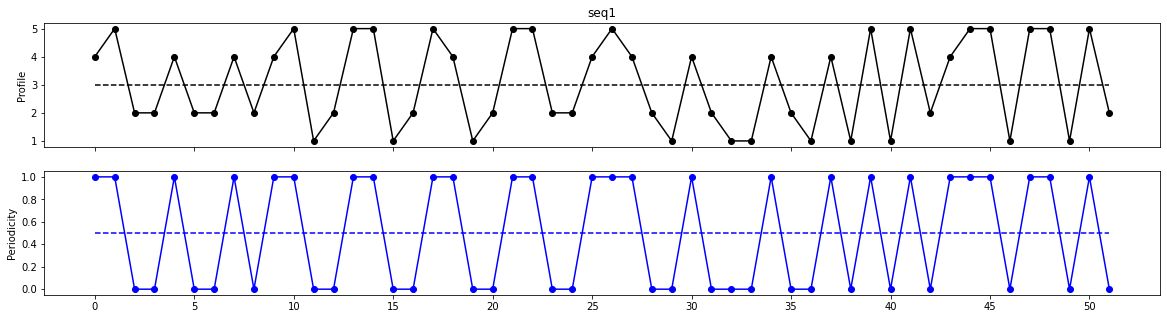

Alpha Helices:
Positions : ['9-25']
Sequences ['AIKSWVKTIARNLLNS']

Beta Sheets:
Positions : ['36-44']
Sequences ['EARIKLNA']



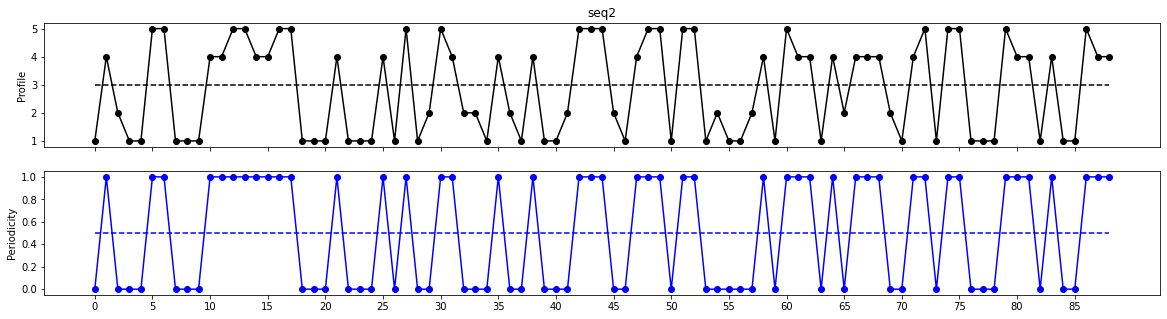

Alpha Helices:
Positions : []
Sequences []

Beta Sheets:
Positions : []
Sequences []



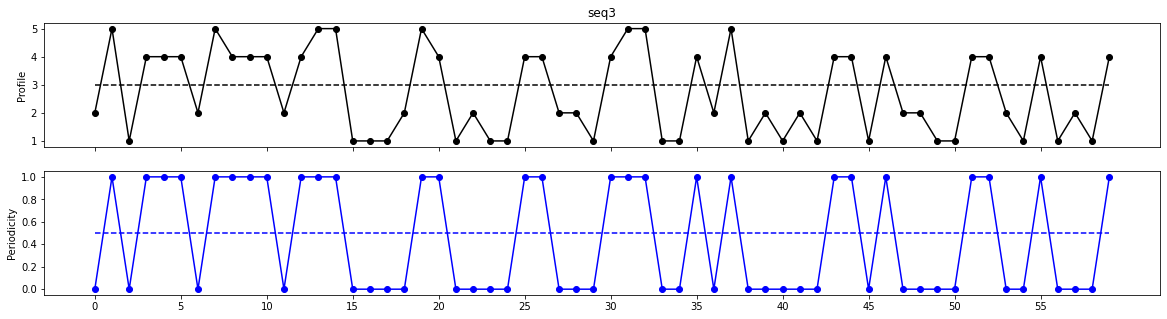

Alpha Helices:
Positions : []
Sequences []

Beta Sheets:
Positions : []
Sequences []



In [13]:
aseqs = []
bseqs = []
for i,seq in zip(ids,seqs):
    mean = np.mean(list(hydro.values()))
    fig,axs = plt.subplots(2,1,sharex=True, figsize = (20,5))
    axs[0].set_title(i[1:])
    axs[0].set_ylabel("Profile")
    axs[0].plot(list(map(calc,seq)), '-ok')
    axs[0].plot([mean]*len(seq), '--k')
    axs[1].plot(list(map(binary, seq)), '-ob')
    axs[1].plot([0.5]*len(seq), '--b')
    axs[1].set_ylabel("Periodicity")
    axs[1].set_xticks(range(0,len(seq),5))
    plt.show()
    bin_seq = (''.join(map(str,(map(binary, seq)))))
    helices = re.finditer('(0011){2,}|(1100){2,}',bin_seq)
    sheets = re.finditer('(01){3,}|(10){3,}',bin_seq)
    helices = [f'{x.start()}-{x.end()}' for x in list(helices)]
    sheets = [f'{x.start()}-{x.end()}' for x in list(sheets)]
    helix_seqs = [seq[int(x.split('-')[0]):int(x.split('-')[1])] for x in helices if len(x) > 0 ]
    sheet_seqs = [seq[int(x.split('-')[0]):int(x.split('-')[1])] for x in sheets if len(x) > 0 ]
    aseqs.append(helix_seqs)
    bseqs.append(sheet_seqs)
    print("Alpha Helices:")
    print(f"Positions : {helices}")
    print(f"Sequences {helix_seqs}\n")
    print("Beta Sheets:")
    print(f"Positions : {sheets}")
    print(f"Sequences {sheet_seqs}\n")


### Question 2

To calculate the amphiphatic index, we take absolute difference between the average hydrophobicity values above and below the dotted black line in the above graphs, for alpha helices and beta sheets

In [3]:
for i,seq,alpha,beta in zip(ids,seqs,aseqs,bseqs):
    print(i)
    print("1. Alpha Helix")
    for helix in alpha:
        for i in range(len(helix)-7):
            temp = np.resize(list(map(calc,helix[i:i+8])),(4,2))
            print(f"{helix[i:i+8]} : {abs(np.round(np.mean(temp[::2].flatten())-np.mean(temp[1::2].flatten()),3))}")
    print()
    print("2. Beta Sheet")
    for sheet in beta:
        for i in range(len(sheet)-5):
            temp = list(map(calc,sheet[i:i+6]))
            print(f"{sheet[i:i+6]} : {np.round(abs(np.mean(temp[::2])-np.mean(temp[1::2])),3)}")
    print("------------------------\n")

>seq1
1. Alpha Helix
TGIVSSFF : 1.22

2. Beta Sheet
YEVSMK : 1.983
QWEIDI : 3.48
WEIDIE : 3.89
EIDIEF : 3.373
KVQFNY : 1.72
ISLGFD : 1.667
SLGFDA : 1.19
LGFDAS : 1.19
------------------------

>seq2
1. Alpha Helix
EDLVKKHA : 2.553
KPLAQSHA : 1.43
PLAQSHAT : 0.17
LAQSHATK : 1.342
AQSHATKA : 0.093
QSHATKAH : 1.265
SHATKAHK : 0.173
HATKAHKN : 1.615
ATKAHKNI : 0.445
TKAHKNIF : 2.0
QGAMNKAL : 1.285

2. Beta Sheet
HEAELK : 2.487
DFGADA : 1.69
------------------------

>seq3
1. Alpha Helix
AATGFVKK : 1.748

2. Beta Sheet
------------------------



### Question 3

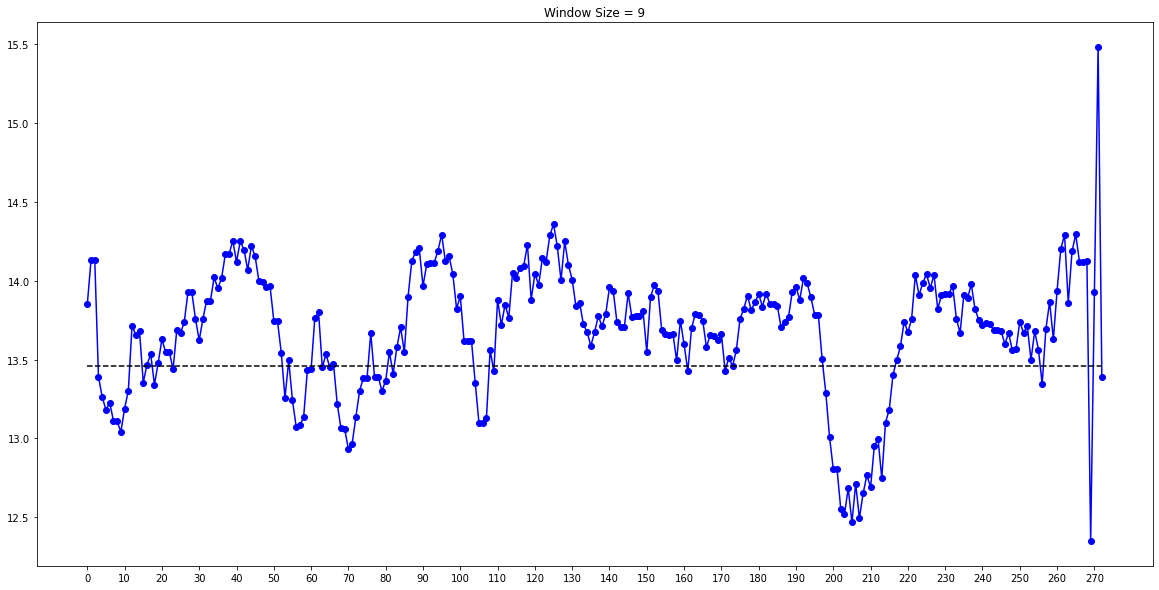

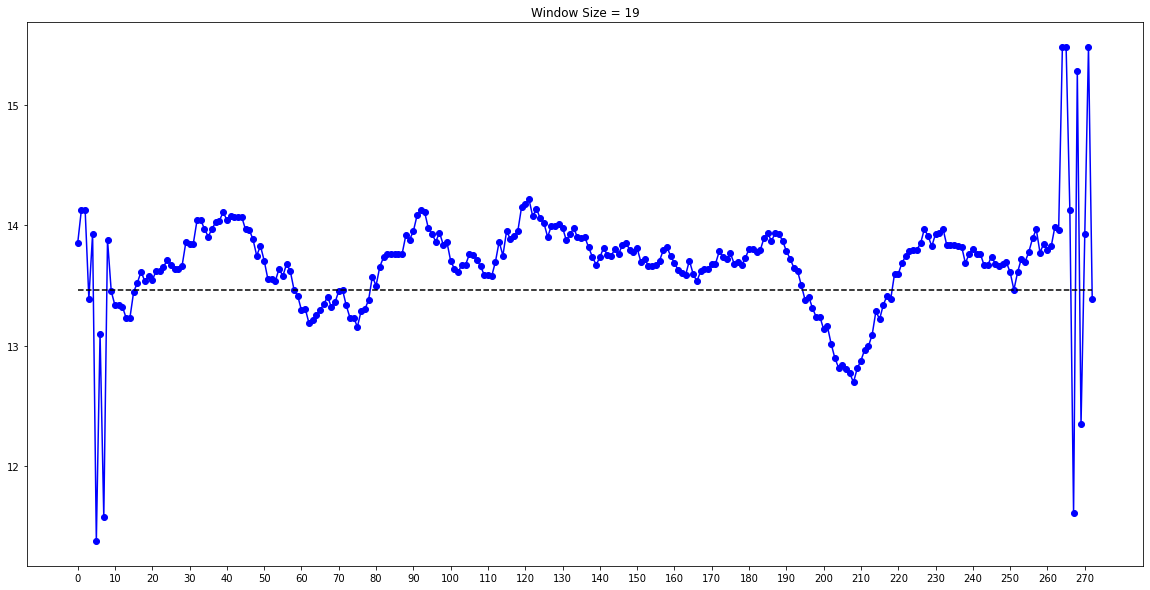

In [4]:
ids, (seq,) = readFasta("Q2.fasta")
temp = (list(map(calc,seq)))
def rolling_window(seq,window):
    temp = (list(map(calc,seq)))
    n = window//2
    return [np.mean(temp[i-n:i+n+1]) if n <= i <= len(seq)-n-1 else temp[i] for i in range(len(seq))]
for window in [9,19]:
    plt.figure(figsize = (20,10))
    plt.plot(rolling_window(seq,window),'o-b')
    mean = np.mean(list(hydro.values()))
    plt.plot([mean]*len(seq), '--k')
    plt.title(f'Window Size = {window}')
    plt.xticks(range(0,len(seq),10))
    plt.show()

#### Transmembrane segments are highly hydrophobic, so from the graphs above, regions with high hydrophobicity are likely to be hydrophobic.

In [5]:
print(f"20 to 50 : {seq[20:50]}")
print(f"82 to 100 : {seq[82:100]}")
print(f"115 to 130 : {seq[115:130]}")
print(f"225 to 240 : {seq[225:240]}")

20 to 50 : LFDFWVGPYFVGFFGVSAIFFIFLGVSLIG
82 to 100 : GGFWQAITVCALGAFISW
115 to 130 : HVPLAFCVPIFMFCV
225 to 240 : ALSIHRLGLFLASNI


### Question 4

1. Pattern 1 : 10406 hits in 10000 sequences
2. Pattern 2 : 3814 hits in 3751 sequences

### Question 5

In [6]:
ids, seqs = readFasta("Q4.fasta")
p1, p2 = "[SV]-T-[VT]-[DERK](2)-{IL}", "[FILV]Qxxx{RK}Gxxx[RK]xx[FILVWY]"
def convert_to_regex(pattern):
    pattern = pattern.replace('{','[^')
    pattern = pattern.replace('}',']')
    pattern = pattern.replace('(','{')
    pattern = pattern.replace(')','}')
    pattern = pattern.replace('x','.')
    pattern = pattern.replace('-','')
    return pattern
data = []
used = set()
for i,seq in zip(ids,seqs):
    if i not in used:
        temp = list(re.finditer(convert_to_regex(p1),seq))
        if temp:
            for x in temp:
                data.extend([[i.split('|')[0][1:],x.start(),x.end()]])
        used.add(i)
df = pd.DataFrame(data, columns = ['id','start','stop'])
df.index = df.id
df.drop(['id'],axis = 1, inplace = True)

In [7]:
df

,start,stop
id,,
4A0C_2,664,670
4A0K_1,665,671
5F0J_3,69,75
5F0L_3,69,75
5F0M_3,69,75
5F0P_3,69,75
5N69_1,68,74
5N6A_1,68,74
5TBY_1,68,74


### Question 6

-->20 sequences were loaded from uniport by searching "Beta barrel"

In [48]:
ids, seqs = readFasta("Q6.fasta")
ids = [x.split('|')[1] for x in ids]
df = pd.DataFrame(index = ids)
df["Server1"] = [1,0,0,0,1,0,0,0,0,1]
df["Server2"] = [1,0,0,0,1,0,0,0,0,1]
print("Number of matches for each server")
df

Number of matches for each server


,Server1,Server2
Q6UD73,1,1
P06996,0,0
P0A910,0,0
O18423,0,0
P0A940,1,1
P66948,0,0
P9WIU5,0,0
Q1I8U1,0,0
Q2MJ20,0,0
H1A981,1,1
